Загрузить датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'C:\Users\majkl\WorkSpace\Project_4\5_transaction_data.csv')
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


In [18]:
print(df.isnull().sum())

date           0
name           0
transaction    0
dtype: int64


In [21]:
df.describe()

,date
count,5315
mean,2020-03-02 00:43:56.628974592
min,2020-03-02 00:00:00
25%,2020-03-02 00:21:50.500000
50%,2020-03-02 00:43:26
75%,2020-03-02 01:06:22.500000
max,2020-03-02 01:29:05


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. 

In [26]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [42]:
transaction = df.transaction.value_counts()
transaction

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

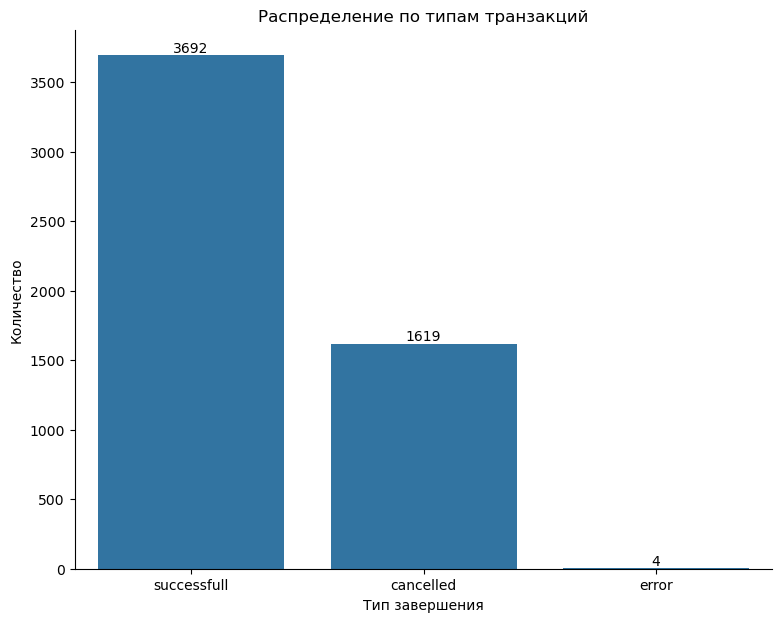

In [44]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=transaction.index, y=transaction.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])
sns.despine()

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [51]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [55]:
tr_tn = 'successfull'
users = df.query('transaction == @tr_tn') \
    .groupby('name') \
    .agg({'transaction': 'count'}) \
    .sort_values('transaction', ascending = False)
users

,transaction
name,
Svetlana_Smirnova,82
Olga_Smirnova,80
Masha_Ozerova,80
Svetlana_Ivanova,79
Svetlana_Polyanova,78
Masha_Polyanova,78
Ekaterina_Smirnova,77
Lolita_Ivanova,76
Irina_Lesnova,76


<Figure size 2000x1500 with 0 Axes>

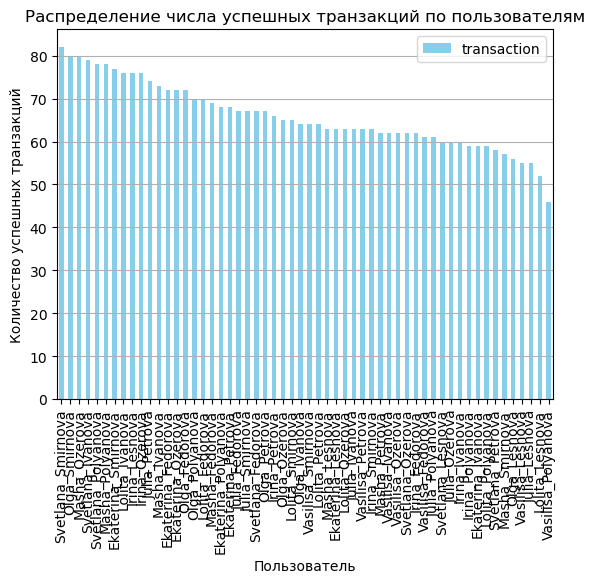

In [63]:
plt.figure(figsize=(20, 15))
users.plot(kind='bar', color='skyblue')
plt.title('Распределение числа успешных транзакций по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество успешных транзакций')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [70]:
user_vs_minute = pd.read_csv(r'C:\Users\majkl\WorkSpace\Project_4\5_transaction_data_updated.csv', parse_dates=['date'])
user_vs_minute

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [71]:
trans_per_minute = user_vs_minute.groupby(['name', 'minute'], as_index=False).size()
trans_per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [72]:
pivot_trans_per_minute = trans_per_minute.pivot(index='minute', columns='name', values='size')
pivot_trans_per_minute.head().fillna(0)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
